In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#IMPORTANDO OS DATAFRAMES

df_serviços = pd.read_excel(r'BaseServiçosPrestados.xlsx')
df_clientes = pd.read_csv(r'CadastroClientes.csv', sep=';')
df_funcionarios = pd.read_csv(r'CadastroFuncionarios.csv', sep= ';', decimal=',')
df_serviços = df_serviços.drop(columns=['Unnamed: 4','Unnamed: 5'])

display(df_clientes)
display(df_funcionarios)
display(df_serviços)

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo
...,...,...,...,...,...,...,...,...,...,...
109,143,C,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Analista,Logística
110,144,S,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Estagiário,Comercial
111,148,S,Caio Stellet,24596,12298.0,4919.2,242,561.12,Analista,Administrativo
112,149,C,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Estagiário,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [174]:
#VALOR FOLHA SALARIAL
folha_mes = df_funcionarios[['Salario Base','Impostos','Beneficios','VT', 'VR']].sum()
folha_mes = folha_mes.sum()
print(f'A folha salarial da empresa e de R$:{folha_mes:,.2f}')

A folha salarial da empresa e de R$:2,717,493.22


In [175]:
#VALOR FATURAMENTO
novo_df_serviços = df_serviços.merge(df_clientes)
novo_df_serviços['valor contrato'] = novo_df_serviços['Tempo Total de Contrato (Meses)'] *  novo_df_serviços['Valor Contrato Mensal']
tot_faturamento = novo_df_serviços['valor contrato'].sum()
print(f'O faturamento total da empresa foi de R$:{tot_faturamento:,}.')

O faturamento total da empresa foi de R$:5,519,160.


In [176]:
#FUNCIONARIOS QUE FECHARAM SERVIÇOS EM %
novo_df_serviços = novo_df_serviços.merge(df_funcionarios)
total_funcionarios = df_funcionarios['ID Funcionário'].unique()
funcionario_serviços = df_serviços['ID Funcionário'].unique()
percentual_fechamento_serviços = len(funcionario_serviços) / len(total_funcionarios)

print(f'Apenas {percentual_fechamento_serviços:2.2%}% dos funcionarios fecharam serviços.')


Apenas 86.84%% dos funcionarios fecharam serviços.


In [177]:
#TOTAL DE FUNCIONARIOS POR AREA
df_funcionarios = df_funcionarios['Area'].value_counts()
df_funcionarios

Comercial         26
Administrativo    26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

<AxesSubplot:>

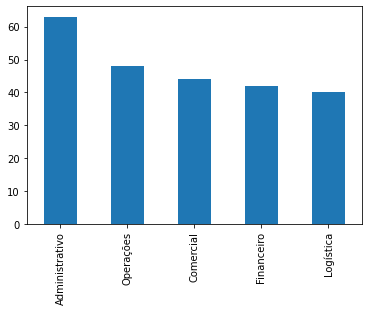

In [178]:
#TOTAL CONTRATOS POR AREA
novo_df_serviços = novo_df_serviços['Area'].value_counts()
novo_df_serviços.plot(kind= 'bar')

In [179]:
#TICKET MEDIO POR MÊS
ticket_medio = df_clientes['Valor Contrato Mensal'].mean()
print(f'O ticket medio do mês foi de R$:{ticket_medio:,.2f}')

O ticket medio do mês foi de R$:2,502.56
